# Introduction 


This dataset provides nutritional information for 77 cereal products from various manufacturers, including key metrics such as calorie count, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, and consumer ratings. In a health-conscious era, understanding the nutritional composition of these products is crucial for both consumers and businesses aiming to make informed decisions.

# Objective

The objective of this analysis is to evaluate the nutritional composition of cereals to identify patterns, compare their health benefits, and determine which product can be classified as the "healthiest." Additionally, this case study aims to develop a scoring system or criteria for ranking cereals based on their nutritional profiles and ratings.

# Goal of the case study

The goal is to provide actionable insights for cereal manufacturers to enhance their product offerings and cater to the needs of health-conscious consumers while empowering individuals to make informed choices. Through this analysis, the findings could influence marketing strategies, product innovation, and nutritional labeling practices.

# Methodology Used

- Step 1 : Importing the warnings and required libraries
- Step 2 : Understanding of the Dataset
- Step 3 : Univariate Analysis
- Step 4 : Bivariate Analysis
- Step 5 : Overall Analysis
- Step 6 : Feature Importance using Random Forest
- Step 7 : Conclusion and Recomendation

### Step 1 : Importing the warnings and required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [132]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor

### Step 2 : Understanding of the Dataset

In [5]:
cereal = pd.read_csv('cereal.csv')
cereal.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


In [7]:
cereal.shape

(77, 16)

In [9]:
cereal.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [11]:
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [13]:
#Checking for any missing value

cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

- We can see that the dataset has no missing value and id good to go for further analysis.
- We can say that no further data cleaning is required we can jump top the analysis of the dataset 

### Step 3 : Univariate Analysis

#### Popping the columns so that it is easy for us to analyse them independently

In [16]:
cereal.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

#### Finding out the unique cereal names

In [18]:
unique_cereal_name = cereal['name'].unique()
print(unique_cereal_name)

['100% Bran' '100% Natural Bran' 'All-Bran' 'All-Bran with Extra Fiber'
 'Almond Delight' 'Apple Cinnamon Cheerios' 'Apple Jacks' 'Basic 4'
 'Bran Chex' 'Bran Flakes' "Cap'n'Crunch" 'Cheerios'
 'Cinnamon Toast Crunch' 'Clusters' 'Cocoa Puffs' 'Corn Chex'
 'Corn Flakes' 'Corn Pops' 'Count Chocula' "Cracklin' Oat Bran"
 'Cream of Wheat (Quick)' 'Crispix' 'Crispy Wheat & Raisins' 'Double Chex'
 'Froot Loops' 'Frosted Flakes' 'Frosted Mini-Wheats'
 'Fruit & Fibre Dates; Walnuts; and Oats' 'Fruitful Bran' 'Fruity Pebbles'
 'Golden Crisp' 'Golden Grahams' 'Grape Nuts Flakes' 'Grape-Nuts'
 'Great Grains Pecan' 'Honey Graham Ohs' 'Honey Nut Cheerios' 'Honey-comb'
 'Just Right Crunchy  Nuggets' 'Just Right Fruit & Nut' 'Kix' 'Life'
 'Lucky Charms' 'Maypo' 'Muesli Raisins; Dates; & Almonds'
 'Muesli Raisins; Peaches; & Pecans' 'Mueslix Crispy Blend'
 'Multi-Grain Cheerios' 'Nut&Honey Crunch' 'Nutri-Grain Almond-Raisin'
 'Nutri-grain Wheat' 'Oatmeal Raisin Crisp' 'Post Nat. Raisin Bran'
 'Product

#### Understanding the types of cereals

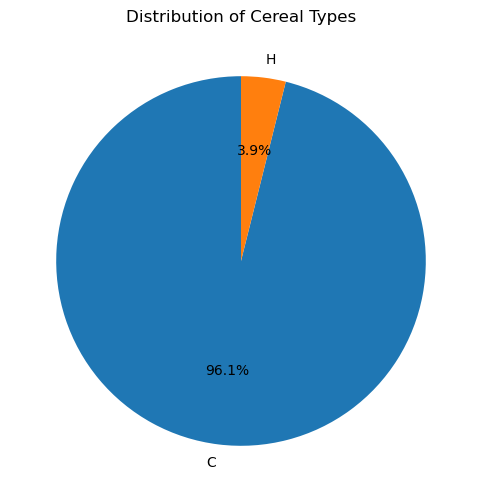

In [20]:
# Getting the counts of each type
type_counts = cereal['type'].value_counts()

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cereal Types')
plt.show()

- We can see that 96.1% cereals can be served cold however only 3.9% of them are served hot.

#### Understanding the remaining columns using histogram

In [23]:
# Let's create a function so that we don't need to retype everything each plot
def plot_histogram(column_data, column_name):
    plt.figure(figsize=(5, 3))
    plt.title(f"Distribution of {column_name}")
    sns.histplot(column_data, kde=True)
    plt.show()

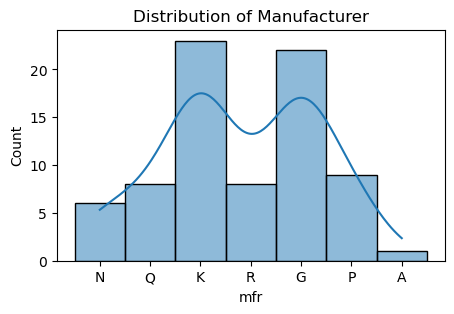

In [25]:
plot_histogram(cereal['mfr'], 'Manufacturer')

The histogram demonstrates that Kellogg's and General Mills are the leading cereal manufacturers in our dataset. This distribution displays two distinct peaks, underscoring the significant dominance of these two companies within our product range.

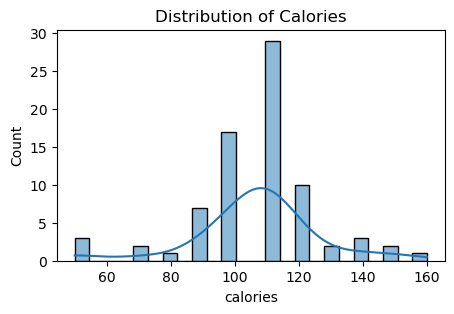

In [28]:
plot_histogram(cereal['calories'], 'Calories')

The calorie distribution in our dataset follows a normal distribution with a bell-shaped curve, with most cereals offering approximately 100-120 calories per serving.

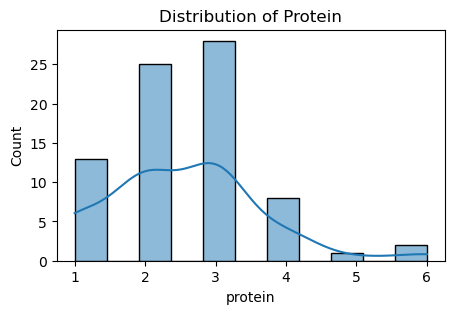

In [31]:
plot_histogram(cereal['protein'], 'Protein')

Most of our products have a protein content ranging from 2 to 3 grams, as shown by our right-skewed histogram.

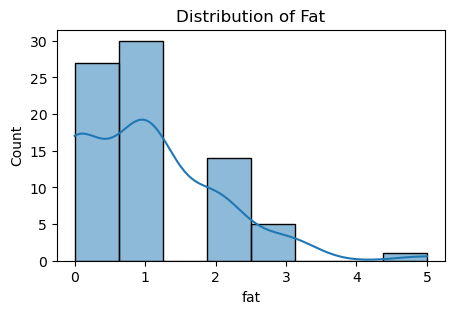

In [34]:
plot_histogram(cereal['fat'], 'Fat')

The distribution of fat content per gram also exhibits a right-skewed pattern, with the majority of servings containing 0-1 gram. Some
cereals have up to 5 grams of fat per serving, which, although slightly higher, does not qualify as an extreme outlier and does not
significantly impact our analysis.

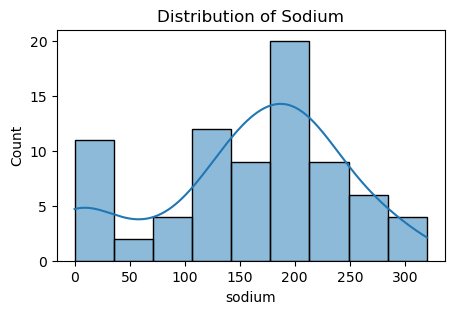

In [37]:
plot_histogram(cereal['sodium'], 'Sodium')

For the contents of sodium, we can observe a normal distribution of our data, showing that 150-250 milligrams of servings for our cereals.

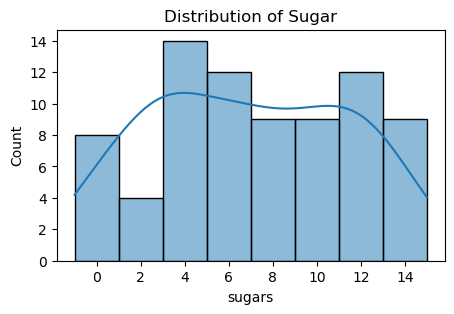

In [40]:
plot_histogram(cereal['sugars'], 'Sugar')

The histogram shows sugar content in cereals ranges from 0 to 15 grams, with peaks around 4–6 and 12–14 grams. It highlights a balance between low-sugar and high-sugar options, appealing to diverse consumer preferences. The even distribution suggests opportunities to target mid-range sugar levels (6–10 grams) for balanced health benefits.

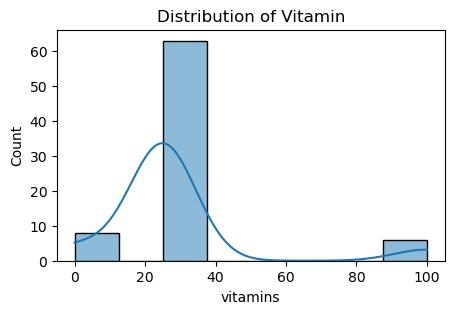

In [43]:
plot_histogram(cereal['vitamins'], 'Vitamin')

The histogram shows most cereals have 25–50% of the recommended daily vitamin value, while fewer offer 0% or 100%. The distribution suggests manufacturers focus on moderate vitamin enrichment. This trend caters to consumers seeking balanced nutrition, though the extremes indicate niche options for minimal or full vitamin supplementation.

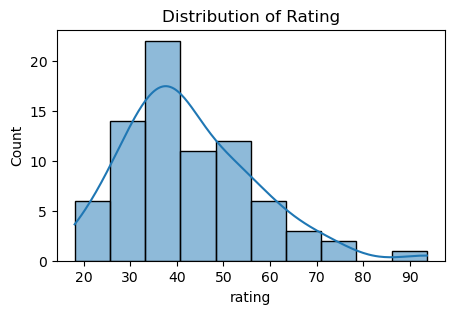

In [46]:
plot_histogram(cereal['rating'], 'Rating')

The histogram shows cereal ratings are skewed right, with most ratings between 30 and 50. Few cereals achieve ratings above 70, indicating limited top-tier options. The distribution suggests most cereals are moderately rated, leaving opportunities for brands to improve quality and differentiate themselves to achieve higher consumer satisfaction.

- Let us explore some relationships between the variables

### Step 4 : Bivariate Analysis

#### Comparison between Numerical vs Numerical Variables

##### Finding the correlation between all the numerical columns

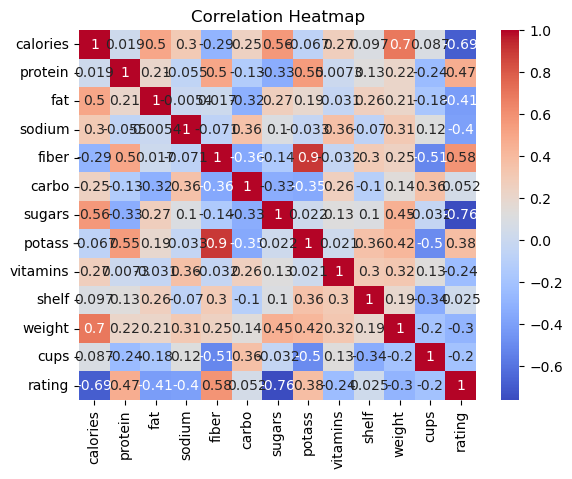

In [68]:
# Selecting only numerical columns
numerical_data = cereal.select_dtypes(include=['float64', 'int64'])

# Calculating correlation and plot heatmap
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap reveals key relationships among cereal attributes. Higher sugar, fat, and calorie content tend to lower ratings, while fiber and protein contribute positively. Sugary cereals are often more calorie-dense. Sodium and vitamins exhibit weak correlations with most features. Overall, cereals with healthier compositions receive better ratings.

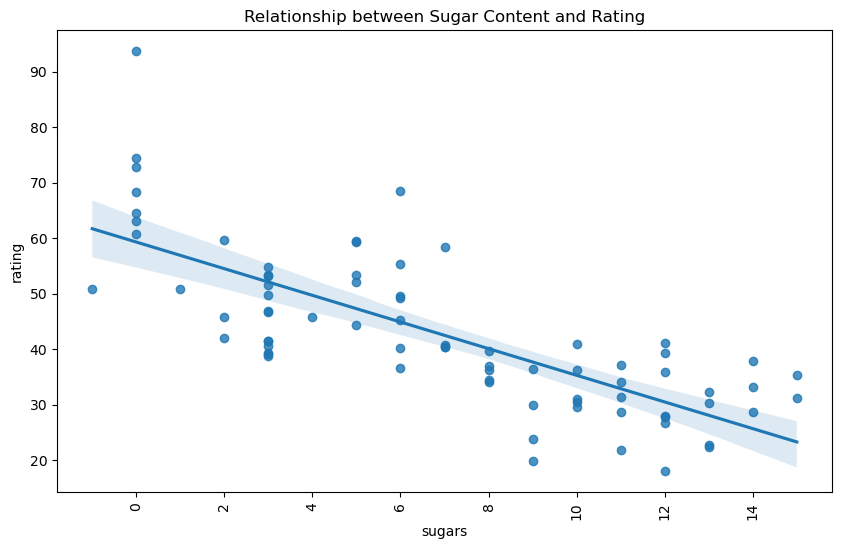

In [130]:
plt.figure(figsize=(10, 6))
plt.title('Relationship between Sugar Content and Rating')
plt.xticks(rotation=90)
sns.regplot(data=cereal, x=cereal['sugars'], y=cereal['rating'])
plt.show()

The scatter plot illustrates a negative correlation between sugar content and cereal ratings. As sugar levels increase, ratings tend to decline, suggesting that consumers or evaluators favor cereals with lower sugar content. The trend line reinforces this inverse relationship, highlighting a preference for healthier, less sugary options in the dataset.

#### Comparison between Categorical vs Numerical Variables

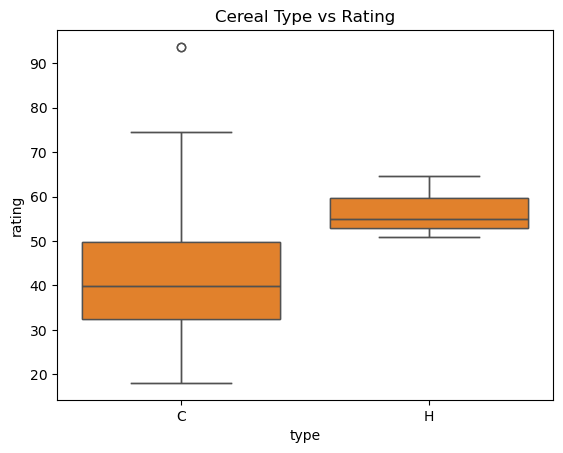

In [76]:
sns.boxplot(x='type', y='rating', data=cereal)
plt.title('Cereal Type vs Rating')
plt.show()

The box plot compares ratings between cold (C) and hot (H) cereals. Hot cereals exhibit consistently higher ratings with less variation, while cold cereals show greater spread and lower median ratings, including some outliers. This suggests that hot cereals are generally preferred, whereas cold cereals receive mixed evaluations with varied consumer preferences.

#### Comparison between Categorical vs Categorical Variables

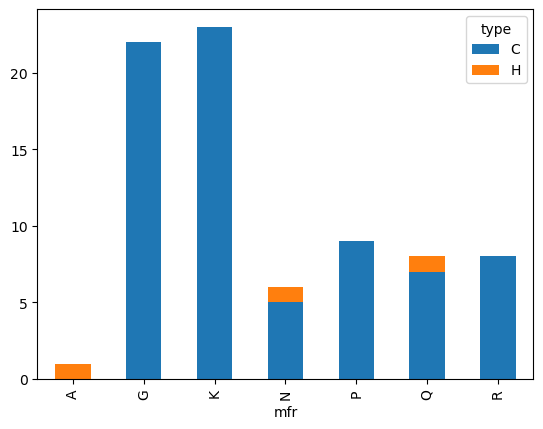

In [150]:
#Understanding the relationship between mfr and type of the cereals

cereal.groupby(['mfr', 'type']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

The bar chart illustrates the distribution of motifs C and H across various mfr values. Type C motifs are significantly more abundant than Type H motifs across all mfr values, peaking at values G and K, while Type H motifs peak at value Q.

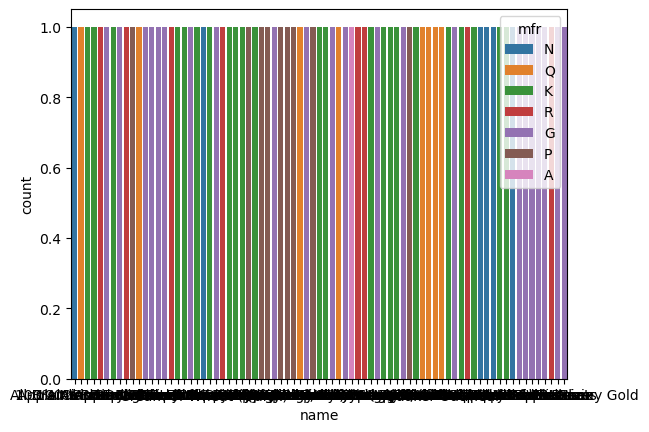

In [95]:
sns.countplot(x='name', hue='mfr', data=cereal)
plt.show()

The bar chart displays the counts of various "mfr" values for different "name" labels. Each "mfr" category is represented by a unique color, with the bar height reflecting the count for that "mfr" within the corresponding "name" group. The chart shows differing abundance levels for each "mfr" across the "name" labels.

#### Analysing pairwise relationships between numerical variables

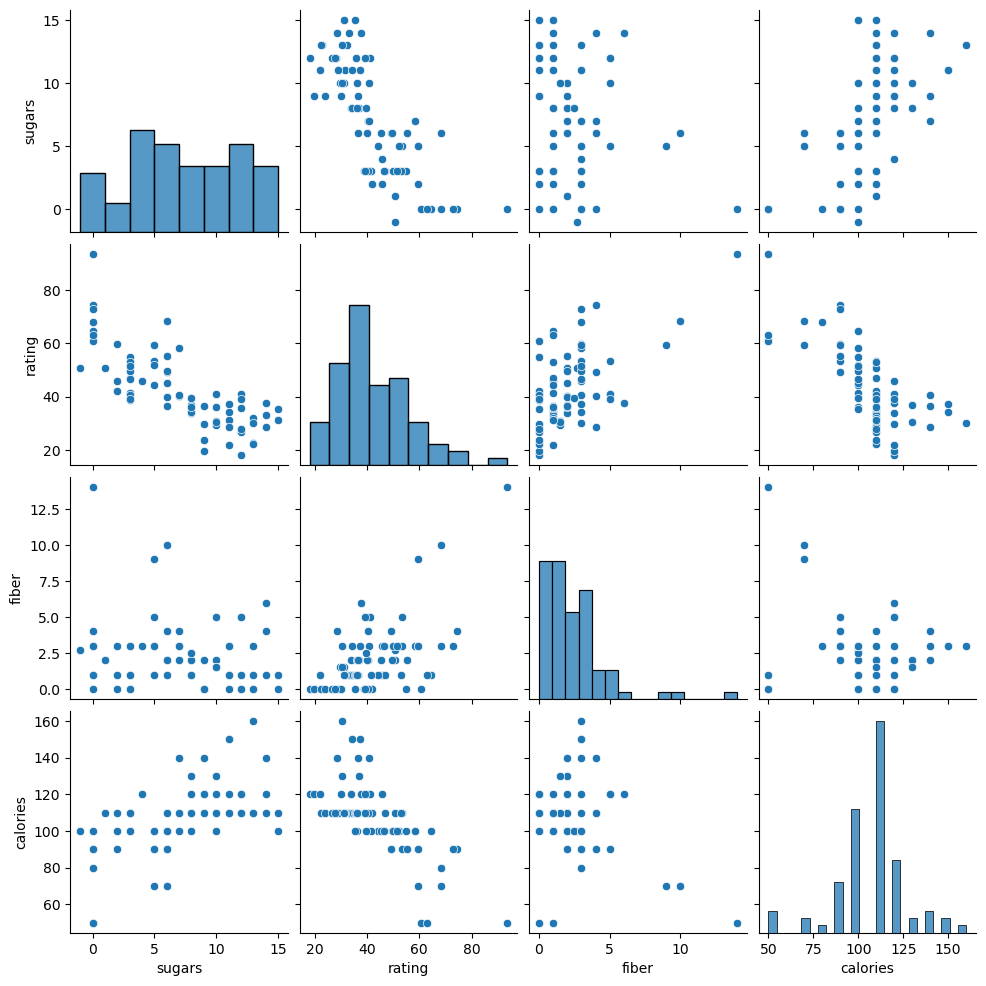

In [98]:
sns.pairplot(cereal[['sugars', 'rating', 'fiber', 'calories']])
plt.show()

- Sugars-Calories: There is a weak positive correlation between sugars and calories.
- Sugars-Rating: A slight negative correlation exists between sugars and rating.
- Sugars-Fiber: A weak negative correlation is observed between sugars and fiber.
- Rating-Calories: A weak positive correlation exists between rating and calories.
- Rating-Fiber: A weak positive correlation is noted between rating and fiber.
- Fiber-Calories: There is a weak positive correlation between fiber and calories.

#### Overall: The pairplot indicates that higher sugar content is often linked to lower ratings and fiber content, while higher calorie content is generally associated with higher ratings and fiber content.

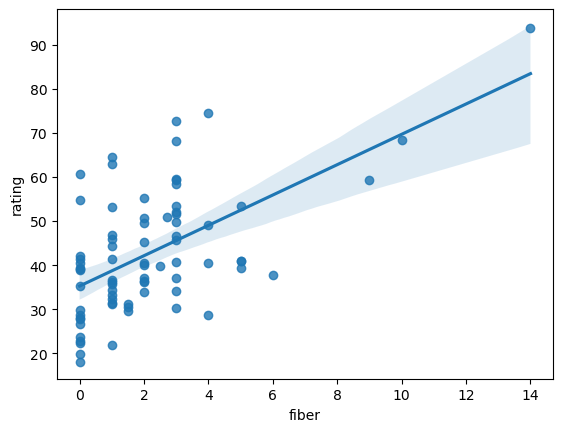

In [100]:
sns.regplot(x='fiber', y='rating', data=cereal)
plt.show()

- Positive Correlation: The regplot clearly shows a positive correlation between fiber content and rating. This suggests that as the fiber content in a cereal increases, its rating tends to increase as well.

- Moderate Strength: The correlation appears to be moderately strong, as indicated by the upward slope of the regression line and the relatively close clustering of the data points around the line.


- Potential Outliers: There might be a few potential outliers, particularly at the higher end of the fiber scale, where some cereals have high fiber content but relatively lower ratings. These outliers could be worth investigating further.



#### Overall: The regplot suggests that fiber content is a significant factor influencing cereal ratings, with higher fiber generally associated with better ratings. However, other factors likely contribute to the overall rating as well, as evidenced by the scatter of data points around the regression line.

### Step 5 : Overall Analysis

#### After Univariate and Bivariate Analysis, let us understand the dataset as a whole by overall comparison of each variable with one another

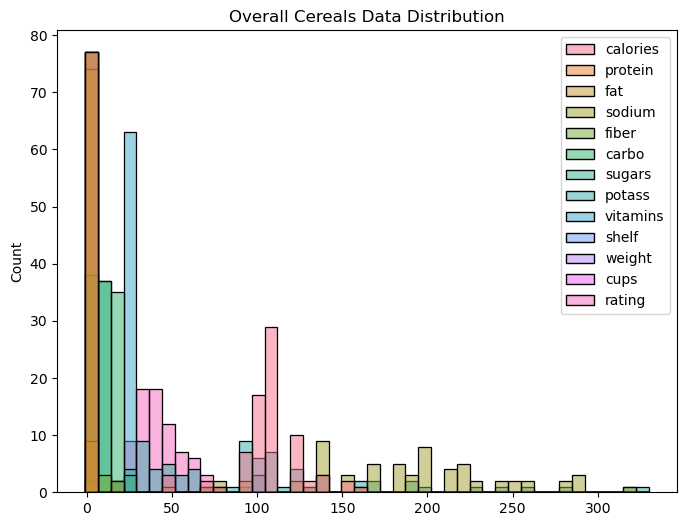

In [137]:
plt.figure(figsize=(8,6))
plt.title("Overall Cereals Data Distribution")
sns.histplot(data = cereal)
plt.show()

##### Overall Observations:

- Skewed Distributions: Most of the variables exhibit skewed distributions, with a concentration of values towards the lower end and a tail extending towards higher values. This suggests that a majority of cereals have lower values for these attributes.
Specific Insights for each Variable:

- Calories: The distribution is heavily skewed towards lower calorie values, with a long tail extending towards higher calorie cereals.
- Protein: Similar to calories, the protein distribution is skewed towards lower values, indicating that most cereals have lower protein content.
- Fat: The fat distribution also shows a similar pattern of skewness, with a concentration of cereals having lower fat content.
- Sodium: The sodium distribution is also skewed towards lower values, with a majority of cereals having lower sodium content.
- Fiber: The fiber distribution is skewed towards lower values, suggesting that most cereals have lower fiber content.
- Carbohydrates: The carbohydrate distribution is skewed towards lower values, indicating that most cereals have lower carbohydrate content.
- Sugars: The sugars distribution is skewed towards lower values, suggesting that most cereals have lower sugar content.
- Potassium: The potassium distribution is skewed towards lower values, indicating that most cereals have lower potassium content.
- Vitamins: The vitamins distribution is skewed towards lower values, indicating that most cereals have lower vitamin content.
- Shelf: The shelf distribution seems to be relatively uniform, with a similar number of cereals across different shelf positions.
- Weight: The weight distribution is skewed towards lower values, suggesting that most cereals have lower weight.
- Cups: The cups distribution is skewed towards lower values, indicating that most cereals have lower serving sizes.
- Rating: The rating distribution is skewed towards higher values, suggesting that most cereals have higher ratings.

  
#### Additional Considerations:

- Outliers: It's important to note that some of the distributions might have potential outliers. These outliers could be influencing the shape of the distributions and should be investigated further to understand their impact on the overall data.
  
#### Overall, the plot provides a valuable overview of the cereal data distribution, highlighting the skewness in most of the variables and allowing for a better understanding of the data characteristics.

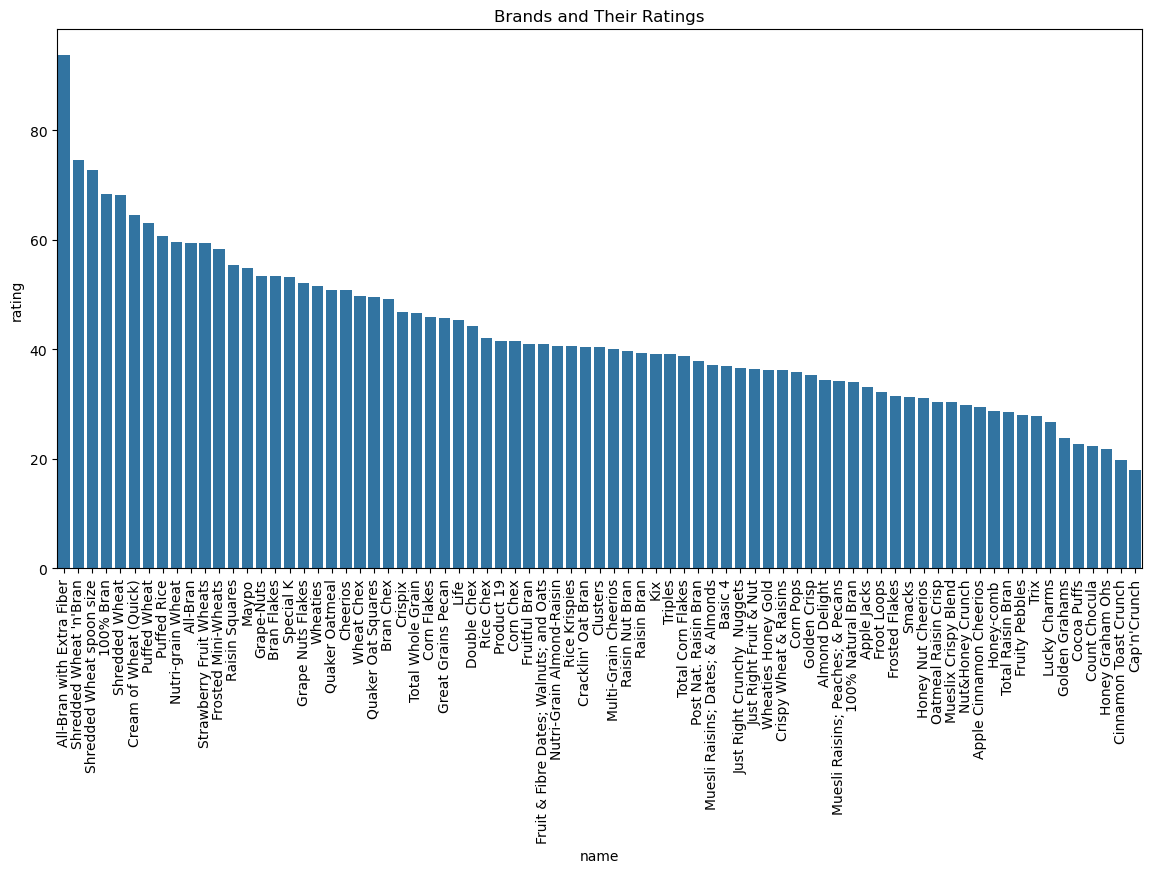

In [138]:
cereals_sorted = cereal.sort_values(by='rating', ascending=False)
plt.figure(figsize=(14,7))
plt.title("Brands and Their Ratings")
plt.xticks(rotation=90)
sns.barplot(data=cereals_sorted, x=cereals_sorted['name'], y=cereals_sorted['rating'])
plt.show()

- All-Bran with Extra Fiber emerges as the highest-rated cereal brand with a rating exceeding 80.
  
- Shredded Wheat variants occupy the next few positions, indicating that cereals with a simple, whole-grain composition tend to be well-regarded.

- Brands with added sugar and flavoring generally have lower ratings. For example, cereals like Frosted Flakes, Froot Loops, and Trix, which are known for their sugary and colorful nature, are situated at the lower end of the chart.

- Healthier cereals like All-Bran, 100% Bran, and Shredded Wheat tend to have higher ratings, suggesting that consumers value cereals with higher nutritional content.

 
#### Overall: The chart highlights a general preference for cereals with a focus on whole grains and lower sugar content. It also suggests that consumers are increasingly conscious of the nutritional value of their breakfast choices.

### Additional Considerations:

- Subjectivity of Rating: It's important to remember that cereal ratings can be subjective and influenced by individual preferences and tastes.
  
- Missing Factors: The chart only considers the brand name and rating. Factors like ingredients, nutritional information, and consumer reviews could provide a more comprehensive understanding of cereal preferences.

### Step 6 : Feature Importance using Random Forest

In [146]:
#Let us drop the non numerical features for our X variable

X = cereal.drop(columns=['name', 'type', 'mfr', 'rating','shelf', 'cups', 'weight'])
y = cereal['rating']

#Fitting our model

model = RandomForestRegressor()
model.fit(X, y)

#Assign our important features for visualization
feature_importances = model.feature_importances_

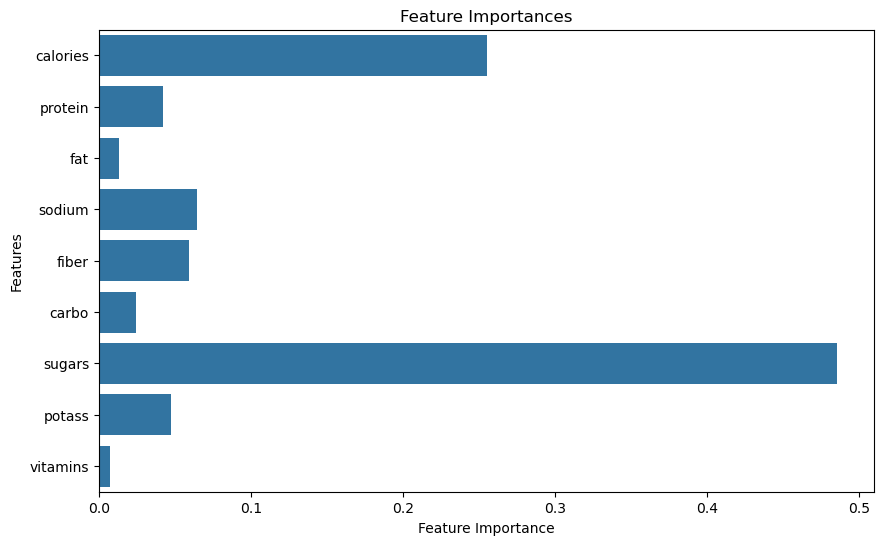

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

- Sugars and Calories are Most Important:  The plot reveals that "sugars" and "calories" are the most influential features in predicting the outcome variable (which is not explicitly mentioned in the plot). This suggests that the model considers these nutritional components to be strong predictors of the target.

- Fiber and Sodium Have Moderate Importance:  "Fiber" and "sodium" have moderate feature importance, indicating that these factors also play a role in the model's predictions, albeit to a lesser extent compared to sugars and calories.

- Other Features Have Low Importance:  "Protein," "fat," "carbo," "potassium," and "vitamins" have relatively low feature importance, suggesting that they have minimal impact on the model's predictions.

#### Overall: The plot provides valuable information about the relative importance of different features in the model. This knowledge can be used to:

- Improve Model Performance: By focusing on engineering features that are deemed more important by the model, we can potentially enhance its predictive accuracy.
- Gain Insights into the Data: The feature importance can shed light on the underlying relationships between the features and the target variable, which can be useful for understanding the data and generating hypotheses.
- Feature Selection: Features with low importance can be considered for removal from the model to reduce complexity and improve interpretability.
  
#### Additional Considerations:

- Model Type: The specific interpretation of feature importance can vary depending on the type of model used (e.g., decision tree, random forest, linear regression).
  
- Data Context: The interpretation of feature importance should always be considered within the context of the data and the problem being addressed.

### Step 7 : Conclusion and Recomendation

##### Overall Cereal Landscape:

- Distribution: The data reveals that most cereals are concentrated in lower ranges for attributes like calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, and vitamins. This suggests that the market is dominated by cereals with lower nutritional values.
  
- Rating Distribution: Interestingly, the rating distribution is skewed towards higher values, suggesting that a majority of cereals on the market receive favorable ratings, despite the overall lower nutritional content in many cases.
Brand Performance:

##### All-Bran with Extra Fiber emerges as the top-rated brand, highlighting the consumer preference for cereals with higher fiber content.

- Shredded Wheat variants also rank high, further emphasizing the consumer inclination towards whole-grain options.
  
- Sugary Cereals: Brands known for their high sugar content (like Frosted Flakes, Froot Loops, Trix) tend to have lower ratings, indicating that consumers are increasingly conscious of sugar intake.

  
##### Feature Importance:

- Sugar and Calories Dominate: "Sugars" and "calories" are identified as the most influential features in predicting cereal ratings. This highlights the significant impact of these nutritional components on consumer perception.
  
- Fiber and Sodium Matter: "Fiber" and "sodium" also play a role in determining ratings, albeit to a lesser extent. This suggests that consumers consider these factors, although their influence might be secondary to sugar and calorie content.

- Other Nutrients Less Influential: "Protein," "fat," "carbohydrates," "potassium," and "vitamins" exhibit relatively low feature importance, indicating that these attributes have a minimal impact on the model's predictions.

  
##### Interpretations and Implications:

- Consumer Priorities: The analysis suggests that consumers prioritize cereals with higher fiber content, lower sugar content, and whole-grain ingredients. This preference for healthier options is evident in the high ratings of brands like All-Bran and Shredded Wheat.

- Health Consciousness: The emphasis on sugar content and calories indicates a growing consumer awareness of the health implications of their breakfast choices.

- Marketing and Product Development: Cereal manufacturers can leverage these insights to develop and market products that cater to consumer preferences. This could involve focusing on increasing fiber content, reducing sugar, and highlighting whole-grain ingredients.


#### Limitations: It's important to remember that this analysis is based on a specific dataset and might not be fully representative of the entire cereal market. Furthermore, factors like taste, texture, and brand loyalty can also influence consumer preferences.


#### In summary, the analysis reveals a complex interplay of factors influencing cereal ratings. Consumer preferences are shifting towards healthier options with higher fiber content and lower sugar content. Cereal manufacturers can capitalize on these insights to develop and market products that align with consumer demands and contribute to a healthier breakfast landscape.